In [2]:
warning = FALSE
library(tidyverse)
library(mosaic)
data <- read_csv("academicStressLevel.csv")
head(data, 5)

Rows: 140 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Timestamp, Your Academic Stage, Study Environment, What coping stra...
dbl (4): Peer pressure, Academic pressure from your home, What would you rat...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intellect,No,3,5
24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intellect,No,3,3
24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intellect,No,4,3
24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intellect,No,4,5


In [3]:
data <- data %>%
    rename(
        timeStamp = `Timestamp`,
        schoolYear = `Your Academic Stage`,
        peerPressure = `Peer pressure`,
        homePressure = `Academic pressure from your home`,
        studyEnvironment = `Study Environment`,
        copingStrategy = `What coping strategy you use as a student?`,
        badHabits = `Do you have any bad habits like smoking, drinking on a daily basis?`,
        academicCompetition = `What would you rate the academic  competition in your student life`,
        stressIndex = `Rate your academic stress index`

    )
data %>%
    head(5)

timeStamp,schoolYear,peerPressure,homePressure,studyEnvironment,copingStrategy,badHabits,academicCompetition,stressIndex
<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>
24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intellect,No,3,5
24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intellect,No,3,3
24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intellect,No,4,3
24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intellect,No,4,5


In [4]:
data <- data %>%
    mutate(studyEnvironment = as.factor(studyEnvironment),
           copingStrategy = as.factor(copingStrategy),
           badHabits = as.factor(badHabits),
           academicCompetition = as.factor(academicCompetition),
           homePressure = as.factor(homePressure),
           stressIndex = as.factor(stressIndex)
    )
data %>%
    head(5)

timeStamp,schoolYear,peerPressure,homePressure,studyEnvironment,copingStrategy,badHabits,academicCompetition,stressIndex
<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intellect,No,3,5
24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intellect,No,3,3
24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intellect,No,4,3
24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intellect,No,4,5


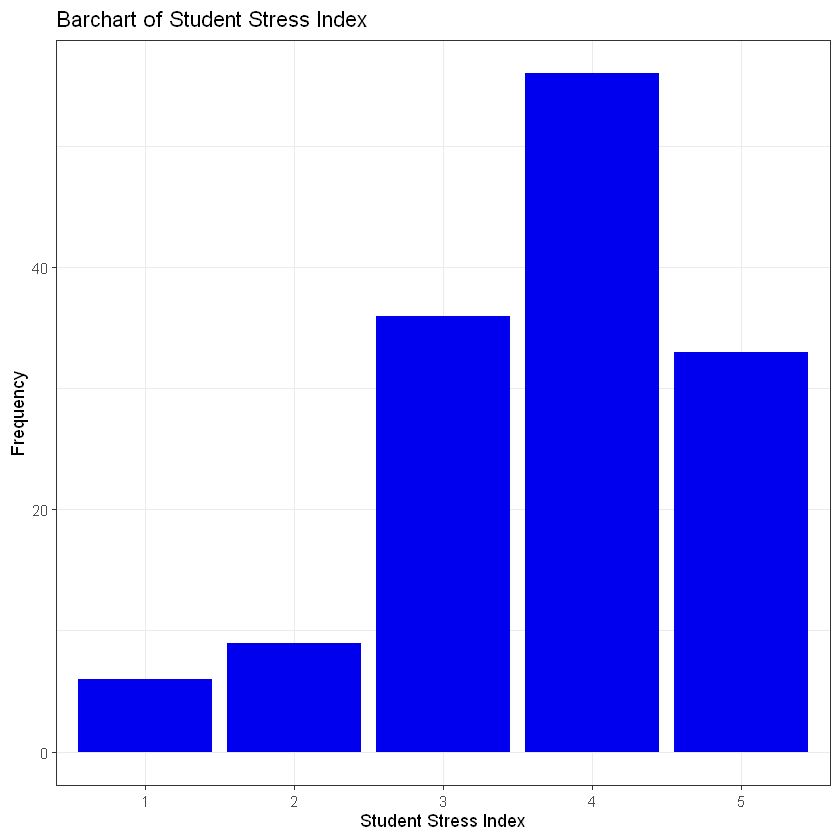

In [8]:
data %>%
    ggplot(aes(stressIndex)) +
    geom_bar(fill = "blue2") +
    theme_bw() +
    labs(x = "Student Stress Index",
         y = "Frequency",
         title = "Barchart of Student Stress Index")

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  4  5
         1  5  0  0  1  0
         2  0  0  0  0  0
         3  0  0  0  0  0
         4  1  9 31 50 14
         5  0  0  5  5 19

Overall Statistics
                                          
               Accuracy : 0.5286          
                 95% CI : (0.4425, 0.6134)
    No Information Rate : 0.4             
    P-Value [Acc > NIR] : 0.001405        
                                          
                  Kappa : 0.274           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5
Sensitivity           0.83333  0.00000   0.0000   0.8929   0.5758
Specificity           0.99254  1.00000   1.0000   0.3452   0.9065
Pos Pred Value        0.83333      NaN      NaN   0.4762   0.6552
Neg Pred Value        0.99254  0.93571   0.7429   0.8286   0.8739
Prevalence            0.04286  

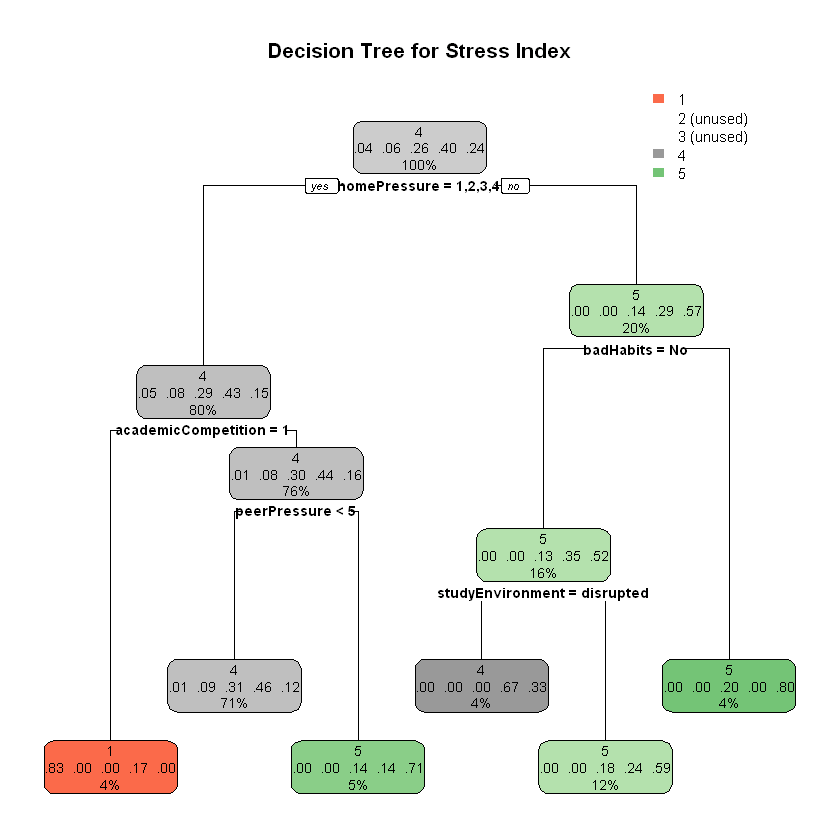

In [7]:
library(rpart)
library(rpart.plot)
library(caret)
data <- as.data.frame(data)

model <- rpart(stressIndex ~ peerPressure + homePressure + studyEnvironment +
               copingStrategy + badHabits + academicCompetition, 
               data = data, method = "class",
               control = rpart.control(maxdepth = 3, minbucket = 2))

rpart.plot(model, type=2, extra=104, fallen.leaves=TRUE, main="Decision Tree for Stress Index")

pred <- predict(model, data, type = "class")

conf_mat <- confusionMatrix(pred, data$stressIndex)
print(conf_mat)

accuracy <- conf_mat$overall['Accuracy']
precision <- conf_mat$byClass[,'Precision']
recall <- conf_mat$byClass[,'Recall']
f1 <- conf_mat$byClass[,'F1']

cat("Accuracy:", accuracy, "\n\n")
cat("Precision per class:\n")
print(precision)
cat("\nRecall per class:\n")
print(recall)
cat("\nF1-score per class:\n")
print(f1)
